In [39]:
import pandas as pd
from process_data import  get_df
import numpy as np
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.0f' % x)

df = get_df()


In [40]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [41]:
#  Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you 
# identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.

non_numeric_columns = df.select_dtypes(exclude=['number']).columns

df_numeric = df.drop(non_numeric_columns, axis=1)

cleaned_data = df_numeric.fillna(df_numeric.mean())

In [42]:
# In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
# sessions frequency 

session_frequency = df['MSISDN/Number'].value_counts()
session_frequency = session_frequency .reset_index()
session_frequency.columns = ['MSISDN/Number', 'session_frequency']
session_frequency.head(10)


,MSISDN/Number,session_frequency
0,33626320676,18
1,33614892860,17
2,33625779332,17
3,33659725664,16
4,33760536639,15
5,33675877202,15
6,33667163239,13
7,33603127838,12
8,33786323068,12
9,33760413819,12


In [43]:
# In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
# sessions  session duration
import pandas as pd

df['start_time'] = pd.to_datetime(df['Start'])
df['end_time'] = pd.to_datetime(df['End'])
df['duration'] = df['end_time'] - df['start_time']

# Group by customer_id and sum the session durations
total_session_duration = df.groupby('MSISDN/Number')['duration'].sum()

# Reset index to make 'customer_id' a regular column
total_session_duration = total_session_duration.reset_index()

total_session_duration = total_session_duration.sort_values(by='duration', ascending=False)
total_session_duration

,MSISDN/Number,duration
13180,33625779332,214 days 17:49:00
6437,33614892860,115 days 08:40:00
92923,33760536639,107 days 09:41:00
13526,33626320676,101 days 18:18:00
65118,33667163239,101 days 05:03:00
...,...,...
24741,33650431620,0 days 02:01:00
85146,33698390293,0 days 02:01:00
35287,33659328207,0 days 02:00:00
60767,33665660120,0 days 01:59:00


In [29]:
# In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
# total data usage (DL and UL)
import pandas as pd


df['Total Data Usage'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']

# Group by customer_id and sum the session durations
total_data_usage = df.groupby('MSISDN/Number')['Total Data Usage'].sum()

# Reset index to make 'customer_id' a regular column
total_data_usage = total_data_usage.reset_index()

total_data_usage = total_data_usage.sort_values(by='Total Data Usage', ascending=False)
total_data_usage

,MSISDN/Number,Total Data Usage
6437,33614892860,8846226494
92923,33760536639,8514773963
13180,33625779332,8499620722
13526,33626320676,7971167261
76363,33675877202,7891110608
...,...,...
76161,33675475328,38022357
104769,33782507973,37929241
63657,33666684512,33999624
43677,33661319633,33575840


In [52]:

merged_df = pd.merge(session_frequency, total_session_duration,  on='MSISDN/Number', how='outer')

# Merge the result with total_data_usage on 'MSISDN/Number'
merged_df = pd.merge(merged_df, total_data_usage, on='MSISDN/Number', how='outer')

merged_df


,MSISDN/Number,session_frequency,duration,Total Data Usage
0,33626320676,18,101 days 18:18:00,7971167261
1,33614892860,17,115 days 08:40:00,8846226494
2,33625779332,17,214 days 17:49:00,8499620722
3,33659725664,16,46 days 16:54:00,7705862783
4,33760536639,15,107 days 09:41:00,8514773963
...,...,...,...,...
106851,33660679060,1,0 days 15:48:00,646349893
106852,33645165347,1,1 days 03:06:00,634702779
106853,33658209707,1,1 days 01:53:00,197565402
106854,33663377441,1,1 days 02:33:00,734390097


/mnt/d/tenacademy/codes/week1/eda/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


        MSISDN/Number  session_frequency  duration  Total Data Usage  Cluster
0         33626320676                 18   8792280        7971167261        2
1         33614892860                 17   9967200        8846226494        2
2         33625779332                 17  18553740        8499620722        2
3         33659725664                 16   4035240        7705862783        2
4         33760536639                 15   9279660        8514773963        2
...               ...                ...       ...               ...      ...
106851    33660679060                  1     56880         646349893        1
106852    33645165347                  1     97560         634702779        1
106853    33658209707                  1     93180         197565402        1
106854    33663377441                  1     95580         734390097        1
106855    33619622058                  1     97920         401522016        1

[106856 rows x 5 columns]


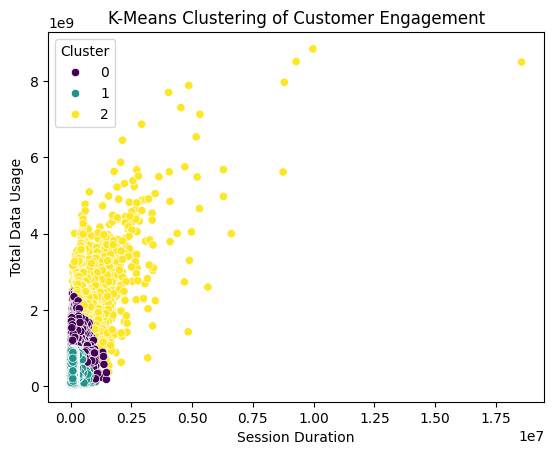

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



# Select the engagement metrics for clustering
merged_df['duration'] = merged_df['duration'].dt.total_seconds()
engagement_metrics = merged_df[['session_frequency', 'duration', 'Total Data Usage']]

# Normalize the engagement metrics using StandardScaler
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics)

# Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(normalized_metrics)

# Display the DataFrame with the cluster assignments
print(merged_df)

# Plot the clusters
sns.scatterplot(x='duration', y='Total Data Usage', hue='Cluster', data=merged_df, palette='viridis')
plt.title('K-Means Clustering of Customer Engagement')
plt.xlabel('Session Duration')
plt.ylabel('Total Data Usage')
plt.show()
